In [99]:
import os
from os.path import isfile
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.transform import resize
from PIL import Image
import sys

In [100]:
newfolderpath = './New folder/'
os.listdir(newfolderpath)

['160401027', '160401041', '160401043', '160401048']

In [101]:
files = os.listdir(newfolderpath)
for file in files:
    images = os.listdir(newfolderpath+file)
    for img in images:
        if img.split('.')[1] == 'jpg':
            Image.open(path + file + '/' + img).save(path + file + '/' + img.split('.')[0] + '.png')
            # Saving jpg images as png

In [102]:
path = './data_signature/'
os.listdir(path)

['150401051',
 '160401002',
 '160401027',
 '160401041',
 '160401043',
 '160401048',
 '160401050',
 '160401051',
 '170401011',
 '170401012',
 '170401025',
 '170401070',
 '170401073',
 '170401076']

In [103]:
path = './data_signature/'

folders = listdir(path)
list_of_img = []
imglabels = {'170401076':'0', '160401002':'1', '160401027':'2', 
          '160401043':'3', '160401048':'4', '160401050':'5', '160401051':'6', '170401011':'7', 
          '170401012':'8', '170401025':'9', '170401070':'10', '170401073':'11','160401041': '12','150401051':'13'}
y = []
X_test = []
y_test = []

for folder in folders:
    
    print(folder)
    for i in range(1,32):
        imgpath = path + folder + '/' + folder + '_'
        if i<10:
            imgpath = imgpath + '0' + str(i) + '_cropped_.png'
        elif i>10 and i!=31:
            imgpath = imgpath + str(i) + '_cropped_.png'
        else:
            imgpath = imgpath + 'test_cropped_.png'

        img = plt.imread(imgpath)
        
        img = img[:,:,0]
        img = resize(img, (200, 200))
        img = np.ndarray.flatten(img)
        
        if i==31:
            X_test.append(img)
            y_test.append(imglabels[folder])
        
        else:
            list_of_img.append(img)
            y.append(imglabels[folder])

150401051


C:\Users\metehaansecer\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\metehaansecer\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


160401002
160401027
160401041
160401043
160401048
160401050
160401051
170401011
170401012
170401025
170401070
170401073
170401076


In [104]:
len(list_of_img)

420

In [105]:
X = np.array(list_of_img)
y = np.array(y, dtype=object)

In [106]:
X_test = np.array(X_test)
y_test = np.array(y_test, dtype=object)

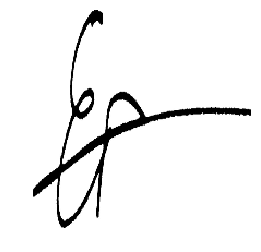

3


In [107]:
i = 120
plt.imshow(X[i].reshape(200,200), cmap ='gray')
plt.axis("off")
plt.show()
print(y[i])

In [108]:
(X.shape), (y.shape), (X_test.shape, y_test.shape)

((420, 40000), (420,), ((14, 40000), (14,)))

In [109]:
y

array(['13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13',
       '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13',
       '13', '13', '13', '13', '13', '13', '13', '13', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '12', '12', '12', '12', '12', '12', '12', '12',
       '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12',
       '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4

In [110]:
X = X / 255

In [111]:
X_test = X_test / 255
X.shape

(420, 40000)

In [112]:
digits = 14

examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [128]:
digits = 14

examples = y_test.shape[0]

y_test = y_test.reshape(1, examples)

Yt_new = np.eye(digits)[y_test.astype('int32')]
Yt_new = Yt_new.T.reshape(digits, examples)

ValueError: cannot reshape array of size 14 into shape (1,1)

In [119]:
(y.shape, Y_new.shape), (y_test.shape, Yt_new.shape)

(((1, 420), (14, 420)), ((1, 14), (14, 14)))

In [120]:
m = 420
m_test = X.shape[0] - m

#X_train, X_test = X[:m].T, X[m:].T
#Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
X_train = X[:m].T
Y_train = Y_new[:,:m]
X_test = X_test.T
Y_test = Yt_new

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

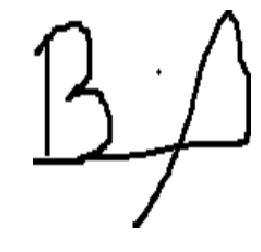

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [121]:
i = 12
plt.imshow(X_train[:,i].reshape(200,200), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [122]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [123]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [124]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  14.885005197932923
Epoch 100 cost:  2.2324911739991973
Epoch 200 cost:  1.9015941047028189
Epoch 300 cost:  1.623324270117885
Epoch 400 cost:  1.3783258996335366
Epoch 500 cost:  1.1661190812447333
Epoch 600 cost:  0.9857864528721352
Epoch 700 cost:  0.835035018639551
Epoch 800 cost:  0.7104838382323029
Epoch 900 cost:  0.608218043373907
Epoch 1000 cost:  0.5243658305233119
Epoch 1100 cost:  0.45545539956576203
Epoch 1200 cost:  0.39855543179041186
Epoch 1300 cost:  0.3512784607398675
Epoch 1400 cost:  0.3117188996112375
Epoch 1500 cost:  0.278371137992782
Epoch 1600 cost:  0.2500501840532264
Epoch 1700 cost:  0.22582329504099546
Epoch 1800 cost:  0.20495424677008564
Epoch 1900 cost:  0.18685921416442042
Final cost: 0.17122017484639643


In [125]:
from sklearn.metrics import classification_report, confusion_matrix

In [126]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         1
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00         1
          9       1.00      1.00  

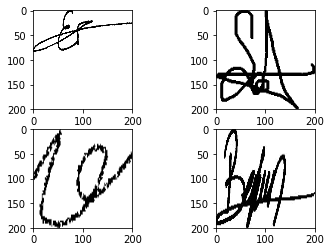

In [127]:
plt.subplot(2,2,1)
plt.imshow(X[:,91].reshape(200,200), cmap ='gray')
plt.subplot(2,2,2)
plt.imshow(X[:,160].reshape(200,200), cmap ='gray')
plt.subplot(2,2,3)
plt.imshow(X[:,410].reshape(200,200), cmap ='gray')
plt.subplot(2,2,4)
plt.imshow(X[:,312].reshape(200,200), cmap ='gray')
plt.show()

In [129]:
"Veri seti küçük olduğundan over fitting oldu ama bütün imzaları doğru bildi."

'Veri seti küçük olduğundan over fitting oldu ama bütün imzaları doğru bildi.'